<a href="https://colab.research.google.com/github/Rushabh309/Sentimental-analysis-of-twitter-Data/blob/master/Sentimental_analysis_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
import io
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Upload Dataset

In [5]:
from google.colab import files
uploaded = files.upload()

Saving twitt30k.csv to twitt30k.csv


In [6]:
df = pd.read_csv(io.StringIO(uploaded['twitt30k.csv'].decode('utf-8')))
df_original = df.copy()


In [7]:
df.head(1)

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1


In [8]:
test = pd.read_csv('twitt30k.csv')
test_original=test.copy()

In [9]:
test_original.head(1)

,twitts,sentiment
0,@robbiebronniman Sounds like a great night.,1


In [10]:
combine = df.append(test,ignore_index=True,sort=True)

In [11]:
combine.head(1)

,sentiment,twitts
0,1,@robbiebronniman Sounds like a great night.


In [12]:
combine.tail(1)

,sentiment,twitts
59999,1,@mariap91 i'd usually ask you about the sun an...


In [13]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [14]:
combine['Tidy_Twitts'] = np.vectorize(remove_pattern)(combine['twitts'], "@[\w]*")
combine.head()

,sentiment,twitts,Tidy_Twitts
0,1,@robbiebronniman Sounds like a great night.,Sounds like a great night.
1,1,Damn the person who stolde my wallet !!!!! Ma...,Damn the person who stolde my wallet !!!!! Ma...
2,1,Greetings from the piano bench (photo) http:/...,Greetings from the piano bench (photo) http:/...
3,1,@drewryanscott i love it!! i love you!! haha f...,i love it!! i love you!! haha forget a hug......
4,0,"@kissthestars Pretty pretty pretty please, pak...","Pretty pretty pretty please, pakidownload ito..."


In [16]:
combine['Tidy_Twitts'] = combine['Tidy_Twitts'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,sentiment,twitts,Tidy_Twitts
0,1,@robbiebronniman Sounds like a great night.,Sounds like great night.
1,1,Damn the person who stolde my wallet !!!!! Ma...,Damn person stolde wallet !!!!! karma come bac...
2,1,Greetings from the piano bench (photo) http:/...,Greetings from piano bench (photo) http://twit...
3,1,@drewryanscott i love it!! i love you!! haha f...,love it!! love you!! haha forget hug...you sho...
4,0,"@kissthestars Pretty pretty pretty please, pak...","Pretty pretty pretty please, pakidownload then..."
5,0,Really upset http://myloc.me/5x1T,Really upset http://myloc.me/5x1T
6,1,@lilyroseallen big pool or paddling pool?! mig...,pool paddling pool?! might able manage paddle ...
7,1,@arianna_skye Hee! I did tweet... And you'...,"Hee! tweet... you're 10,001!!!"
8,1,is happy to have Tickets for the Concerts,happy have Tickets Concerts
9,1,"@mileycyrus http://twitpic.com/78urd - Miley, ...","http://twitpic.com/78urd Miley, look soooo muc..."


In [17]:
tokenized_twitts = combine['Tidy_Twitts'].apply(lambda x: x.split())
tokenized_twitts.head()

0                        [Sounds, like, great, night.]
1    [Damn, person, stolde, wallet, !!!!!, karma, c...
2    [Greetings, from, piano, bench, (photo), http:...
3    [love, it!!, love, you!!, haha, forget, hug......
4    [Pretty, pretty, pretty, please,, pakidownload...
Name: Tidy_Twitts, dtype: object

In [18]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [19]:
tokenized_twitts = tokenized_twitts.apply(lambda x: [ps.stem(i) for i in x])
tokenized_twitts.head()

0                         [sound, like, great, night.]
1    [damn, person, stold, wallet, !!!!!, karma, co...
2    [greet, from, piano, bench, (photo), http://tw...
3    [love, it!!, love, you!!, haha, forget, hug......
4    [pretti, pretti, pretti, please,, pakidownload...
Name: Tidy_Twitts, dtype: object

In [20]:
for i in range(len(tokenized_twitts)):
    tokenized_twitts[i] = ' '.join(tokenized_twitts[i])

In [21]:
combine['Tidy_Twitts'] = tokenized_twitts
combine.head()

,sentiment,twitts,Tidy_Twitts
0,1,@robbiebronniman Sounds like a great night.,sound like great night.
1,1,Damn the person who stolde my wallet !!!!! Ma...,damn person stold wallet !!!!! karma come back...
2,1,Greetings from the piano bench (photo) http:/...,greet from piano bench (photo) http://twitpic....
3,1,@drewryanscott i love it!! i love you!! haha f...,love it!! love you!! haha forget hug...you sho...
4,0,"@kissthestars Pretty pretty pretty please, pak...","pretti pretti pretti please, pakidownload then..."


In [22]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [23]:
all_words_positive = ' '.join(text for text in combine['Tidy_Twitts'][combine['sentiment']==0])

In [24]:
all_words_positive = ' '.join(text for text in combine['Tidy_Twitts'][combine['sentiment']==1])

In [25]:
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

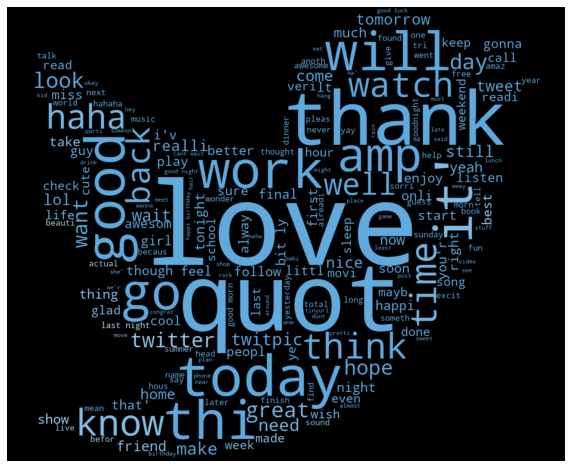

In [26]:
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
plt.axis('off')
plt.show()

In [27]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)

    return hashtags

In [28]:
ht_positive = Hashtags_Extract(combine['Tidy_Twitts'][combine['sentiment']==1])   

In [29]:
ht_positive_unnest = sum(ht_positive,[])

In [30]:
ht_negative = Hashtags_Extract(combine['Tidy_Twitts'][combine['sentiment']==0])   

In [31]:
ht_negative_unnest = sum(ht_negative,[])

In [32]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [33]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

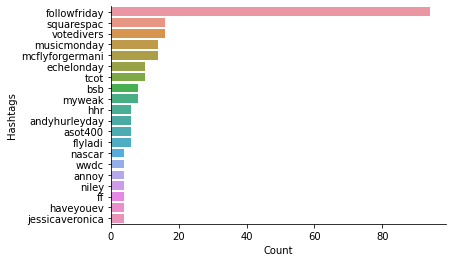

In [34]:
df_positive_plot = df_positive.nlargest(20,columns='Count')
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [35]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [36]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

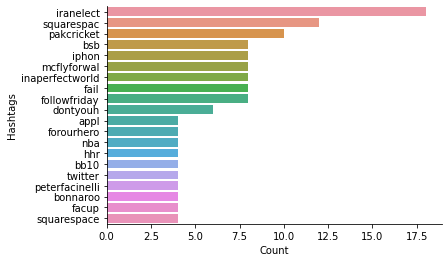

In [37]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['Tidy_Twitts'])
df_bow = pd.DataFrame(bow.todense())

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Twitts'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
train_bow = bow[:30000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [41]:
train_tfidf_matrix = tfidf_matrix[:30000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
from sklearn.model_selection import train_test_split
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df['sentiment'],test_size=0.3,random_state=2)
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,df['sentiment'],test_size=0.3,random_state=17)

In [43]:
from sklearn.metrics import f1_score

In [44]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

In [45]:
Log_Reg.fit(x_train_bow,y_train_bow)
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

In [46]:
prediction_int = prediction_bow[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.7356239985757521

In [47]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

In [48]:
prediction_int = prediction_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.7271279419571757

In [49]:
test_tfidf = tfidf_matrix[30000:]
test_pred = Log_Reg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['sentiment'] = test_pred_int
submission = test['sentiment']

In [50]:
submission.tail(10)

29990    0
29991    1
29992    1
29993    1
29994    1
29995    1
29996    0
29997    1
29998    1
29999    0
Name: sentiment, dtype: int64

#Accuracy

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [52]:
X = df['twitts']
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X = tfidf.fit_transform(X)
Y = df['sentiment']

In [53]:
X.shape

(30000, 10000)

In [54]:
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [55]:
X_train.shape, X_test.shape

((24000, 10000), (6000, 10000))

In [56]:
clf = LinearSVC()
clf.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
Y_pred = clf.predict(X_test)

In [58]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      3054
           1       0.73      0.75      0.74      2946

    accuracy                           0.74      6000
   macro avg       0.74      0.74      0.74      6000
weighted avg       0.74      0.74      0.74      6000

